# PHISHING DATASET

### 1. Cargar datos y chequear integridad

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score,f1_score
from scipy.io import arff
import numpy as np
from ucimlrepo import fetch_ucirepo 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#1) Cargar Datos y chequear identidad.

# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 
  
# data (as pandas dataframes) 
X = phishing_websites.data.features 
y = phishing_websites.data.targets 
  
# metadata 
print(phishing_websites.metadata) 
  
# variable information 
print(phishing_websites.variables) 



{'uci_id': 327, 'name': 'Phishing Websites', 'repository_url': 'https://archive.ics.uci.edu/dataset/327/phishing+websites', 'data_url': 'https://archive.ics.uci.edu/static/public/327/data.csv', 'abstract': 'This dataset collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 11055, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Tue Mar 05 2024', 'dataset_doi': '10.24432/C51W2X', 'creators': ['Rami Mohammad', 'Lee McCluskey'], 'intro_paper': {'ID': 396, 'type': 'NATIVE', 'title': 'An assessment of features related to phishing websites using an automated technique', 'authors': 'R. Mohammad, F. Thabtah, L. Mccluskey', 'venue': 'International Conference for Internet Tec

In [7]:
X.head()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [8]:
y.head()

,result
0,-1
1,-1
2,-1
3,-1
4,1


In [9]:
X.isnull().sum()

having_ip_address             0
url_length                    0
shortining_service            0
having_at_symbol              0
double_slash_redirecting      0
prefix_suffix                 0
having_sub_domain             0
sslfinal_state                0
domain_registration_length    0
favicon                       0
port                          0
https_token                   0
request_url                   0
url_of_anchor                 0
links_in_tags                 0
sfh                           0
submitting_to_email           0
abnormal_url                  0
redirect                      0
on_mouseover                  0
rightclick                    0
popupwindow                   0
iframe                        0
age_of_domain                 0
dnsrecord                     0
web_traffic                   0
page_rank                     0
google_index                  0
links_pointing_to_page        0
statistical_report            0
dtype: int64

In [10]:
y.isnull().sum()

result    0
dtype: int64

### 2. Pensando en un pipeline de Machine Learning, en este paso es necesario preparar los datos. ¿Se debe estandarizar primero y luego separar los datos, o separar los datos primero y luego estandarizar por separado? ¿Por qué?

**Respuesta:**  
Primero, se deben dividir los datos en conjuntos de entrenamiento y prueba. Posteriormente, se deben estandarizar por separado, calculando la media y desviación estándar **solo** en el conjunto de entrenamiento. Luego, se aplican estas mismas medidas al conjunto de prueba. Este orden es fundamental para evitar problemas como el **data leakage** (filtración de datos), que ocurre si estandarizamos los datos antes de separarlos. Esto significaría que el modelo utiliza estadísticas de todo el conjunto de datos, incluidos los de prueba, lo que podría generar un rendimiento engañoso en los datos de prueba y un modelo que no generaliza correctamente en datos nuevos.


### 3. ¿Es recomendable estandarizar los datos en este caso en específico?  explique su respuesta,  y proceda según corresponda.

**Respuesta:**
En este caso, no es necesario estandarizar los datos porque ya se encuentran en un rango acotado (-1, 0, 1), lo que asegura que las características estén en la misma escala. La estandarización es útil cuando las características tienen escalas muy diferentes o valores numéricos grandes, lo que podría afectar el rendimiento de algunos algoritmos de machine learning. Sin embargo, en este caso específico, los datos ya están bien escalados para la aplicación de modelos que se nos pide.

In [11]:
y.mean()

result    0.113885
dtype: float64

In [12]:
y.std()

result    0.993539
dtype: float64

In [13]:
X.mean()

having_ip_address             0.313795
url_length                   -0.633198
shortining_service            0.738761
having_at_symbol              0.700588
double_slash_redirecting      0.741474
prefix_suffix                -0.734962
having_sub_domain             0.063953
sslfinal_state                0.250927
domain_registration_length   -0.336771
favicon                       0.628584
port                          0.728268
https_token                   0.675079
request_url                   0.186793
url_of_anchor                -0.076526
links_in_tags                -0.118137
sfh                          -0.595749
submitting_to_email           0.635640
abnormal_url                  0.705292
redirect                      0.115694
on_mouseover                  0.762099
rightclick                    0.913885
popupwindow                   0.613388
iframe                        0.816915
age_of_domain                 0.061239
dnsrecord                     0.377114
web_traffic              

In [14]:
X.std()

having_ip_address             0.949534
url_length                    0.766095
shortining_service            0.673998
having_at_symbol              0.713598
double_slash_redirecting      0.671011
prefix_suffix                 0.678139
having_sub_domain             0.817518
sslfinal_state                0.911892
domain_registration_length    0.941629
favicon                       0.777777
port                          0.685324
https_token                   0.737779
request_url                   0.982444
url_of_anchor                 0.715138
links_in_tags                 0.763973
sfh                           0.759143
submitting_to_email           0.772021
abnormal_url                  0.708949
redirect                      0.319872
on_mouseover                  0.647490
rightclick                    0.405991
popupwindow                   0.789818
iframe                        0.576784
age_of_domain                 0.998168
dnsrecord                     0.926209
web_traffic              

### 4. Entrenar los modelos NB, QDA, LDA y Logistic Regression utilizando correctamente los conjuntos de entrenamiento, test y validación.


In [15]:
# Dividir en conjunto de entrenamiento (60%), validación (20%) y prueba (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convertir y en arrays unidimensionales
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()
y_test = y_test.values.ravel()

# Entrenar modelos

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Quadratic Discriminant Analysis (QDA)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predecir sobre el conjunto de validación
y_val_pred_nb = nb.predict(X_val)
y_val_pred_qda = qda.predict(X_val)
y_val_pred_lda = lda.predict(X_val)
y_val_pred_lr = lr.predict(X_val)




c:\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### 5. Elija 3 métricas de clasificación que encuentre relevante y explique cuál y por qué encuentra que un modelo es mejor que los demás.

**Respuesta**
- Recall: Esta métrica nos importa en este contexto pues nos va a dar información de todos los sitios web que efectivamente son phishing y cómo se comportó el modelo frente a estos, ademas, un alto recall es crucial para evitar falsos negativos, ya que no identificar un sitio de phishing puede tener consecuencias graves para los usuarios como posibles fraudes.

- F1-score: Esta métrica tiene en cosideración 2 métricas importantes las cuales son Recall y Precisión, por tanto, nos ayudará a mantener un equilibrio entre ambas dependiendo el enfoque que uno quiera adoptar.

- Precisión: En nuestro contexto nos servira para identificar que tan bien reconoce los sitios de phishing correctamente para evitar clasificar incorrectamente un sitio de phishing como uno seguro.

In [16]:
# Calcular las métricas (f1-score, precision, recall)
metrics = {}

metrics['Naive Bayes'] = {
    'precision': precision_score(y_val, y_val_pred_nb),
    'f1-score': f1_score(y_val, y_val_pred_nb),
    'recall': recall_score(y_val, y_val_pred_nb)
}

metrics['QDA'] = {
    'precision': precision_score(y_val, y_val_pred_qda),
    'f1-score': f1_score(y_val, y_val_pred_qda),
    'recall': recall_score(y_val, y_val_pred_qda)
}

metrics['LDA'] = {
    'precision': precision_score(y_val, y_val_pred_lda),
    'f1-score': f1_score(y_val, y_val_pred_lda),
    'recall': recall_score(y_val, y_val_pred_lda)
}

metrics['Logistic Regression'] = {
    'precision': precision_score(y_val, y_val_pred_lr),
    'f1-score': f1_score(y_val, y_val_pred_lr),
    'recall': recall_score(y_val, y_val_pred_lr)
}



metrics_df = pd.DataFrame(metrics).T  # Transponer para que los modelos sean las filas

# Mostrar la tabla de métricas
metrics_df

,precision,f1-score,recall
Naive Bayes,0.997015,0.425478,0.270445
QDA,0.941341,0.423101,0.272874
LDA,0.911462,0.922400,0.933603
Logistic Regression,0.923387,0.925253,0.927126


- **NB:** NB muestra una alta precisión, pero, su bajo recall indica que el modelo no está detectando muchos de los sitios de phishing, lo que es crítico en este contexto. Esto lo hace menos confiable a pesar de su precisión.

- **QDA:** Al igual que NB, QDA tiene una alta precisión y bajo recall, por lo que esta fallando en detectar correctamente los sitios de phishing.

- **LDA:** Rendimiento excepcional, F1-score muy alto que indica un buen equilibrio entre precisión y recall. Además, su alto recall significa que está capturando la mayoría de los sitios de phishing, lo cual es esencial para evitar que los usuarios se vean afectados.

- **Logistic Regression:** Tiene el mismo comportamiento que LDA pero con metricas ligeramente inferiores en las categorias de precision y recall.

Por lo tanto, LDA seria el mejor de los modelos entrenados segun las metricas seleccionadas.


### 6. Realice una matriz de confusión para visualizar cuales fueron los resultados de cada modelo, con el fin de realizar comparaciones. Comente lo que observa.

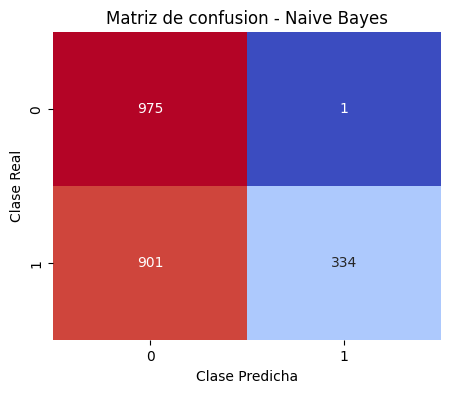

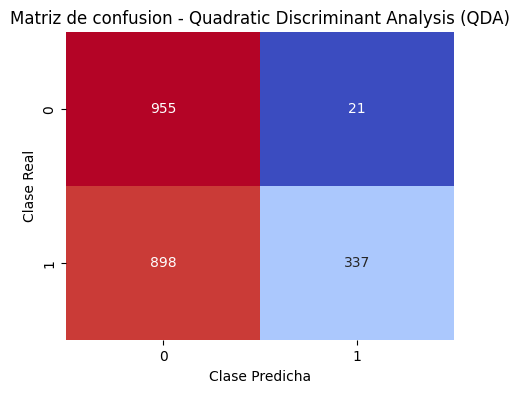

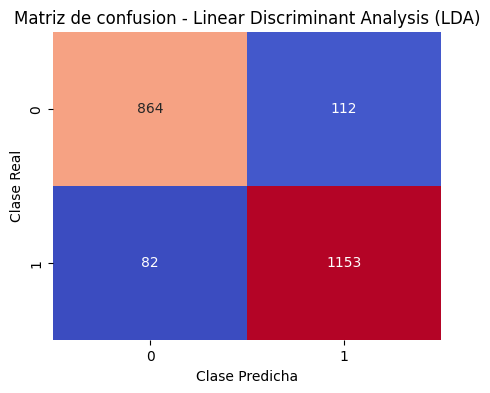

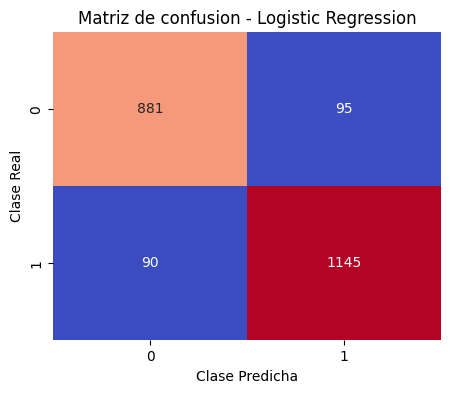

In [25]:
def PlotconfussionMatrix(y_val, y_predict, model):
    matriz = confusion_matrix(y_val, y_predict)
    plt.figure(figsize=(5,4))
    sns.heatmap(matriz, annot=True, fmt="d", cmap="coolwarm", cbar=False)
    plt.title(f'Matriz de confusion - {model}')
    plt.ylabel('Clase Real')
    plt.xlabel('Clase Predicha')
    plt.show()

PlotconfussionMatrix(y_val, y_val_pred_nb, 'Naive Bayes')
PlotconfussionMatrix(y_val, y_val_pred_qda, 'Quadratic Discriminant Analysis (QDA)')
PlotconfussionMatrix(y_val, y_val_pred_lda, 'Linear Discriminant Analysis (LDA)')
PlotconfussionMatrix(y_val, y_val_pred_lr, 'Logistic Regression')


### Análisis Comparativo de Modelos

Como se puede apreciar, **hay una gran diferencia entre algunos modelos**. En la diagonal de las matrices de confusión, se observan los verdaderos positivos y negativos de cada modelo.

- **Naive Bayes** y **QDA** muestran un **rendimiento inferior**, especialmente al clasificar clases negativas. Esto se refleja en la cantidad de falsos negativos que presentan.
  
- Por otro lado, los modelos de **LDA** y **Logistic Regression** presentan un rendimiento notablemente **superior en ambos espectros de clasificación**. Esto se evidencia en una mayor precisión tanto para las clases positivas como negativas.

En conclusión, para este caso específico, podemos afirmar que los modelos de **LDA** y **Logistic Regression** son significativamente mejores en términos de precisión y balance en la clasificación.


### 7. De una pequeña explicación a por qué cree que los dos modelos con peor desempeño tuvieron malos resultados.

Los modelos con peor desempeño, **Naive Bayes** y **QDA**, probablemente tuvieron malos resultados debido a la naturaleza de los datos y las suposiciones que estos modelos hacen sobre ellos:

1. **Naive Bayes**: Este modelo asume que todas las características son independientes entre sí (suposición de independencia condicional), lo que en muchos casos no se cumple en la realidad. Si hay correlaciones significativas entre las características, Naive Bayes tiende a realizar malas predicciones.

2. **Quadratic Discriminant Analysis (QDA)**: QDA supone que las clases siguen una distribución normal y permite que cada clase tenga una matriz de covarianza diferente. Si los datos no se ajustan bien a estas suposiciones o si hay colinealidad (correlación fuerte entre variables), puede afectar su rendimiento. Además, QDA es sensible a los datos ruidosos y a conjuntos de datos pequeños, lo que puede haber influido negativamente en su desempeño en este caso.

En resumen, ambos modelos probablemente fallaron debido a la **falta de ajuste a las suposiciones** que requieren sobre la estructura de los datos.
